In [489]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import kagglehub
from pathlib import Path

path = kagglehub.dataset_download("usaf/world-war-ii")
aerial = pd.read_csv ((Path (path) / Path("operations.csv")))


aerial.to_csv("operations.csv")

aerial

C:\Users\Arath\AppData\Local\Temp\ipykernel_1364\2725733978.py:9: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  aerial = pd.read_csv ((Path (path) / Path("operations.csv")))


,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


1. Which day had most missions?

In [490]:
aerial_mission_date = aerial.groupby("Mission Date")["Mission ID"].count()
aerial_mission_date_df = aerial_mission_date.reset_index()
aerial_mission_date_df.columns = ["Mission Date", "Number of Missions"]
pd.DataFrame(aerial_mission_date_df).sort_values(by = "Number of Missions", ascending = False)


,Mission Date,Number of Missions
846,3/24/1945,896
948,4/15/1945,874
988,4/22/1945,862
928,4/11/1945,838
923,4/10/1945,778
...,...,...
1824,9/25/1939,1
79,1/24/1941,1
833,3/22/1942,1
1731,8/9/1941,1


In [491]:
# Ensure "Mission Date" is in datetime format
aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])
aerial["Year-Month"] = aerial["Mission Date"].dt.to_period("M")
print (aerial["Year-Month"])
missions_per_month = aerial.groupby("Year-Month")["Mission ID"].count()
missions_per_month_df = missions_per_month.reset_index()
missions_per_month_df.columns = ["Month", "Number of Missions"]
missions_per_month_df = missions_per_month_df.sort_values(by="Number of Missions", ascending=False)
pd.DataFrame (missions_per_month_df.head(10))

0         1943-08
1         1943-08
2         1943-08
3         1943-08
4         1943-08
           ...   
178276    1945-02
178277    1945-02
178278    1945-02
178279    1945-02
178280    1945-02
Name: Year-Month, Length: 178281, dtype: period[M]


,Month,Number of Missions
63,1945-04,14354
62,1945-03,13455
53,1944-06,9550
55,1944-08,9379
54,1944-07,8672
61,1945-02,8094
59,1944-12,7752
58,1944-11,7432
56,1944-09,7379
52,1944-05,7332


In [492]:
twc = aerial.groupby("Theater of Operations")["Target Country"].unique()
twc = twc.reset_index()
twc

#MTO_COUNTRIES = twc[twc[]]
#MTO_COUNTRIES

,Theater of Operations,Target Country
0,CBI,"[BURMA, CHINA, INDIA, CHINA MINING, THAILAND O..."
1,EAST AFRICA,"[nan, SUDAN, ETHIOPIA/ABSINNYA, SOMALIA]"
2,ETO,"[GERMANY, HOLLAND OR NETHERLANDS, FRANCE, AUST..."
3,MADAGASCAR,[MADAGASCAR]
4,MTO,"[ITALY, GREECE, HUNGARY, YUGOSLAVIA, ROMANIA, ..."
5,PTO,"[NEW GUINEA, SUMATRA, CORAL SEA AREA, SOLOMON ..."


In [493]:
aerial['Teather'] = aerial['Theater of Operations'].apply(
    lambda x: 'EUROPE' if x in ['ETO', 'MTO', 'EAST AFRICA'] else 'PACIFIC'
)

In [494]:
aerial

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,Year-Month,Teather
0,1,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,1943-08,EUROPE
1,2,1943-08-15,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,1943-08,PACIFIC
2,3,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,1943-08,EUROPE
3,4,1943-08-15,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,1943-08,EUROPE
4,5,1943-08-15,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,1943-08,PACIFIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,1945-02-16,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0,1945-02,PACIFIC
178277,178739,1945-02-16,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0,1945-02,PACIFIC
178278,178740,1945-02-16,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0,1945-02,PACIFIC
178279,178741,1945-02-16,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN,1945-02,PACIFIC


This is a DataFrame!


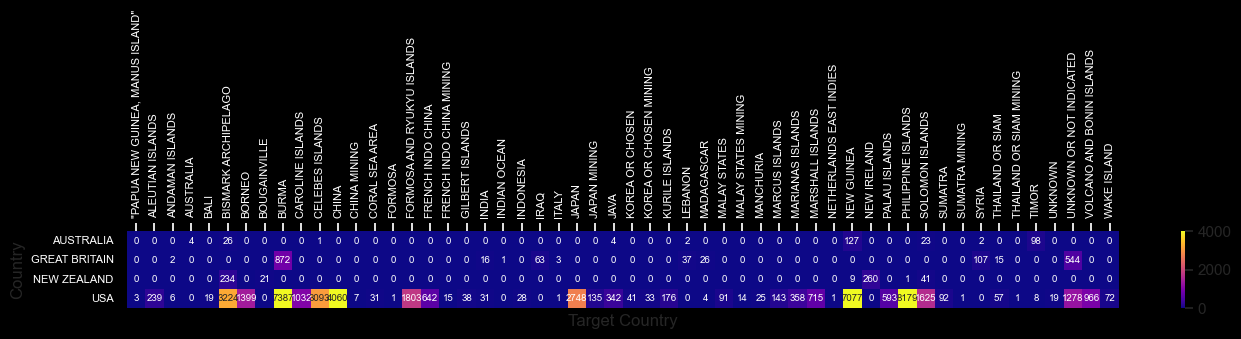

In [ ]:
import pandas as pd

plt.figure(figsize=(18, 1))

aerial_country = aerial[aerial['Teather'] == 'PACIFIC']
aerial_country = aerial_country.dropna(subset=["Country", "Target Country"])  

if isinstance(aerial, pd.DataFrame):
    print("This is a DataFrame!")
else:
    print("Not a DataFrame!")

allies_vs_axis = aerial_country.groupby(["Country", "Target Country"])["Mission ID"].count()
allies_vs_axis = allies_vs_axis.reset_index()
allies_vs_axis = allies_vs_axis.pivot(index="Country", columns="Target Country", values="Mission ID").fillna(0)
allies_vs_axis = allies_vs_axis.astype(int)

ax = sns.heatmap (
allies_vs_axis,
vmin=0,
vmax=4000,
fmt="d",
cmap="plasma",
annot_kws={"size": 7},
annot=True)
ax.set_facecolor("black")
plt.yticks(rotation=0, fontsize=8)
plt.xticks(fontsize=8)
ax.xaxis.tick_top()
plt.xticks(fontsize=8, rotation=90)
annot_kws={"color": "white"}
plt.xticks(color="white")
plt.yticks(color="white")
ax.tick_params(colors="white")
plt.gcf().patch.set_facecolor("black")
# Rotate numbers vertically
for text in ax.texts:           # Loop through all annotation texts
    text.set_rotation(0)       # Set text to vertical orientation

plt.savefig('allies_vs_axis_heatmap.png', dpi=300, bbox_inches='tight')

In [496]:
aerial = aerial[pd.isna(aerial.Country)==False]

In [497]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import re

longitude_min, longitude_max = -180, 180  # Longitude range
latitude_min, latitude_max = -90, 90     # Latitude range
# Drop rows out of latitude and longitude range
aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)
aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Takeoff Latitude"])  # Drop NaN values
aerial = aerial[aerial["Takeoff Latitude"] != ""]   # Drop empty strings explicitly (if they exist)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Takeoff Longitude"])  # Drop NaN values
aerial = aerial[aerial["Takeoff Longitude"] != ""]   # Drop empty strings explicitly (if they exist)

aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
    lambda x: float(x)
)
aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(
    lambda x: float (x)
)

aerial["Target Longitude"] = aerial["Target Longitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)
aerial["Target Latitude"] = aerial["Target Latitude"].apply(
    lambda x: re.sub(r"[A-Za-z]+", "", str(x)) if pd.notnull(x) else np.nan
)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Target Latitude"])  # Drop NaN values
aerial = aerial[aerial["Target Latitude"] != ""]   # Drop empty strings explicitly (if they exist)

# Drop rows where 'Takeoff Latitude' is NaN or empty
aerial = aerial.dropna(subset=["Target Longitude"])  # Drop NaN values
aerial = aerial[aerial["Target Longitude"] != ""]   # Drop empty strings explicitly (if they exist)

aerial["Target Longitude"] = aerial["Target Longitude"].apply(
    lambda x: float(x)
)
aerial["Target Latitude"] = aerial["Target Latitude"].apply(
    lambda x: float (x)
)

print ("ok")

ok


C:\Users\Arath\AppData\Local\Temp\ipykernel_1364\1713812977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial["Takeoff Longitude"] = aerial["Takeoff Longitude"].apply(
C:\Users\Arath\AppData\Local\Temp\ipykernel_1364\1713812977.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial["Takeoff Latitude"] = aerial["Takeoff Latitude"].apply(


In [498]:

world = gpd.read_file(Path("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"))

C:\Users\Arath\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


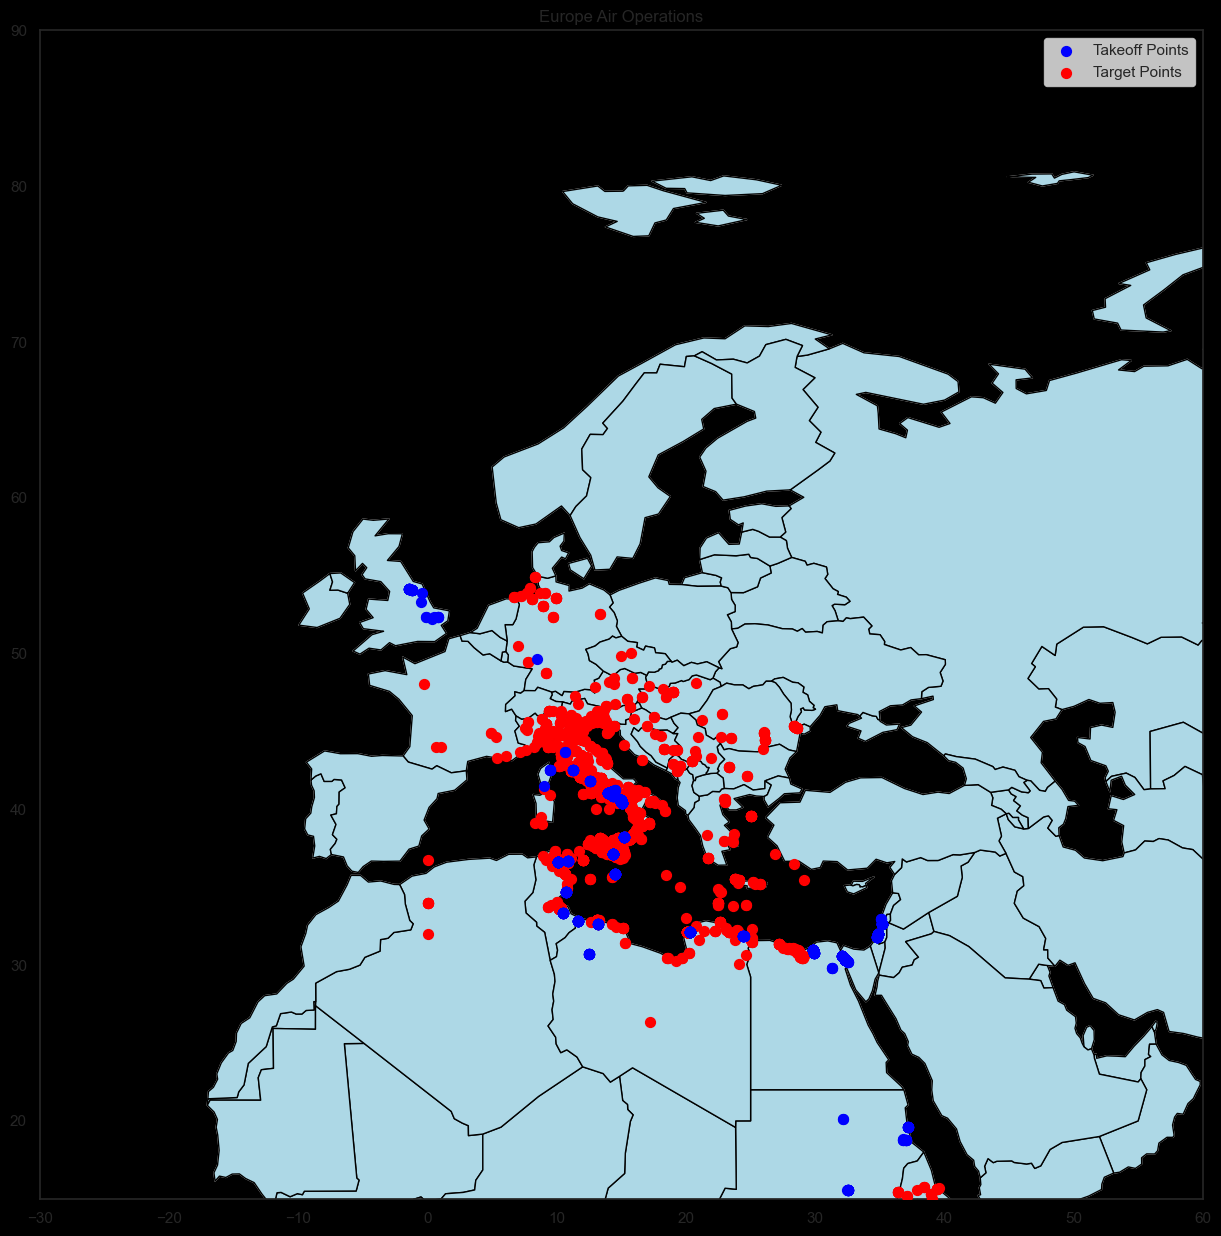

In [499]:
longitude_min, longitude_max = -30, 70  # Longitude range

latitude_min, latitude_max = -90, 90     # Latitude range

europe_north_africa = world.cx[-10:120, 0:90]  # Longitude: -30 to 60, Latitude: 15 to 50

europe_north_africa["bases"] = np.random.randint(0, 100, len(europe_north_africa))

europe_north_africa


fig, ax = plt.subplots(figsize=(15, 16))

fig.patch.set_facecolor('black')  # Set figure background to black
ax.set_facecolor('black')         # Set axes background to black

aerial_pacific_raids = aerial
aerial_euafrica_raids = aerial[
    (aerial["Takeoff Longitude"] >= longitude_min) & 
    (aerial["Takeoff Longitude"] <= longitude_max) &
    (aerial["Takeoff Latitude"] >= latitude_min) & 
    (aerial["Takeoff Latitude"] <= latitude_max)
]

aerial_euafrica_raids = aerial[
    (aerial["Target Longitude"] >= longitude_min) & 
    (aerial["Target Longitude"] <= longitude_max) &
    (aerial["Target Latitude"] >= latitude_min) & 
    (aerial["Target Latitude"] <= latitude_max)
]


europe_north_africa.plot(ax=ax, color="gray")

# Plot takeoff points as triangles
ax.scatter(
    aerial_euafrica_raids["Takeoff Longitude"], 
    aerial_euafrica_raids["Takeoff Latitude"], 
    color="blue", marker="o", s=50, label="Takeoff Points", zorder=8
)

ax.scatter(
    aerial_euafrica_raids["Target Longitude"], 
    aerial_euafrica_raids["Target Latitude"], 
    color="red", marker="o", s=50, label="Target Points", zorder=5
)


# Set title and limits
ax.set_title("Europe and North Africa Map with Takeoff Coordinates")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range

# Add legend
europe_north_africa.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_xlim(-30, 60)  # Longitude range
ax.set_ylim(15, 90)   # Latitude range
ax.set_title("Europe Air Operations")

plt.legend()
# Show the plot
plt.show()

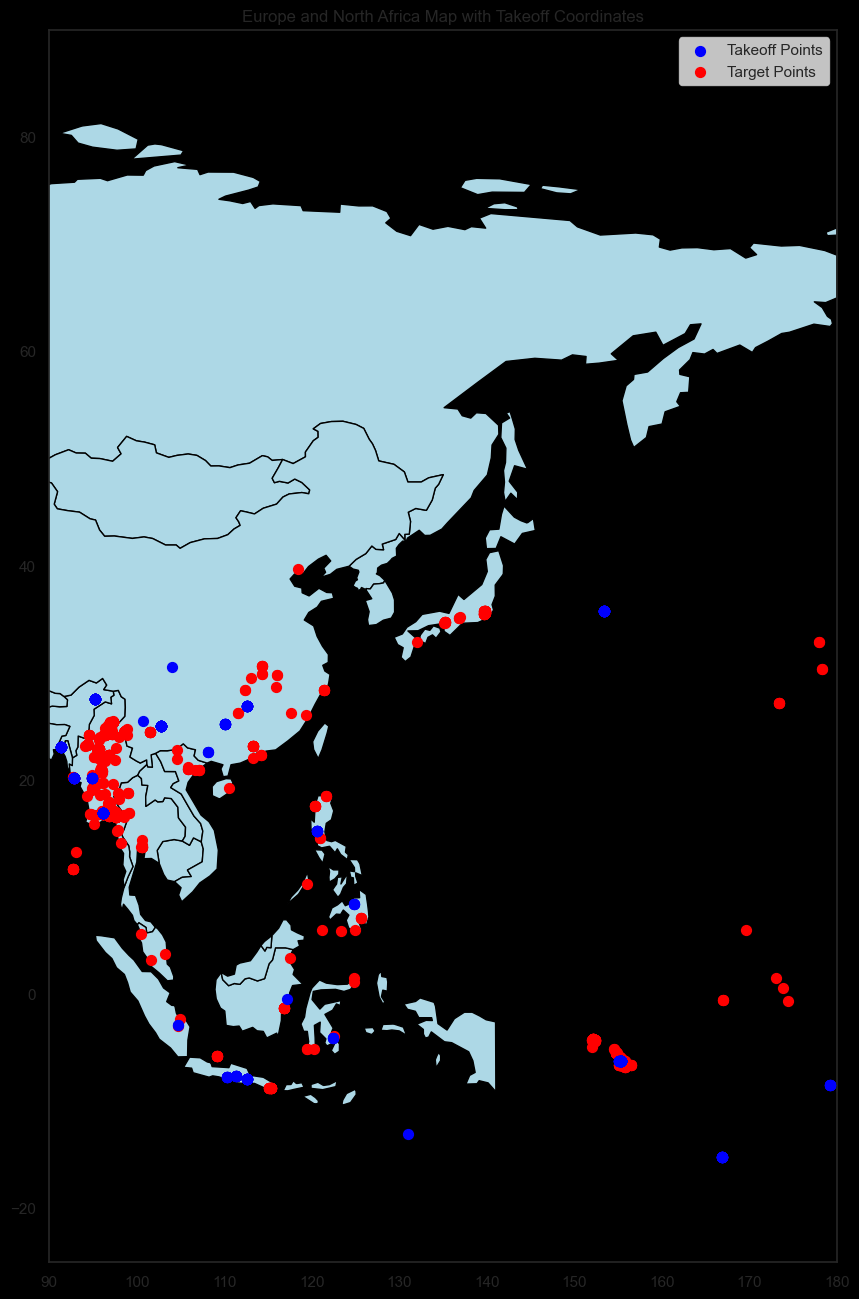

In [500]:


fig, ax = plt.subplots(figsize=(15, 16))
pacific_war = world.cx[-30:200, 0:90]  # Longitude: -30 to 60, Latitude: 15 to 50
pacific_war.plot(ax=ax, color="lightblue", edgecolor="black")


fig.patch.set_facecolor('black')  # Set figure background to black
ax.set_facecolor('black')         # Set axes background to black

aerial_pacific_raids = aerial

# Plot takeoff points as triangles
ax.scatter(
    aerial_pacific_raids["Takeoff Longitude"], 
    aerial_pacific_raids["Takeoff Latitude"], 
    color="blue", marker="o", s=50, label="Takeoff Points", zorder=3
)

ax.scatter(
    aerial_pacific_raids["Target Longitude"], 
    aerial_pacific_raids["Target Latitude"], 
    color="red", marker="o", s=50, label="Target Points", zorder=2
)


# Set title and limits
ax.set_title("Europe and North Africa Map with Takeoff Coordinates")
ax.set_xlim(90, 180)  # Longitude range
ax.set_ylim(-25, 90)   # Latitude range


plt.legend()
# Show the plot
plt.show()

C:\Users\Arath\AppData\Local\Temp\ipykernel_1364\1374497074.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial_euafrica_raids["Takeoff Longitude"] = aerial_euafrica_raids["Takeoff Longitude"][
C:\Users\Arath\AppData\Local\Temp\ipykernel_1364\1374497074.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aerial_euafrica_raids["Takeoff Latitude"] = aerial_euafrica_raids["Takeoff Latitude"][


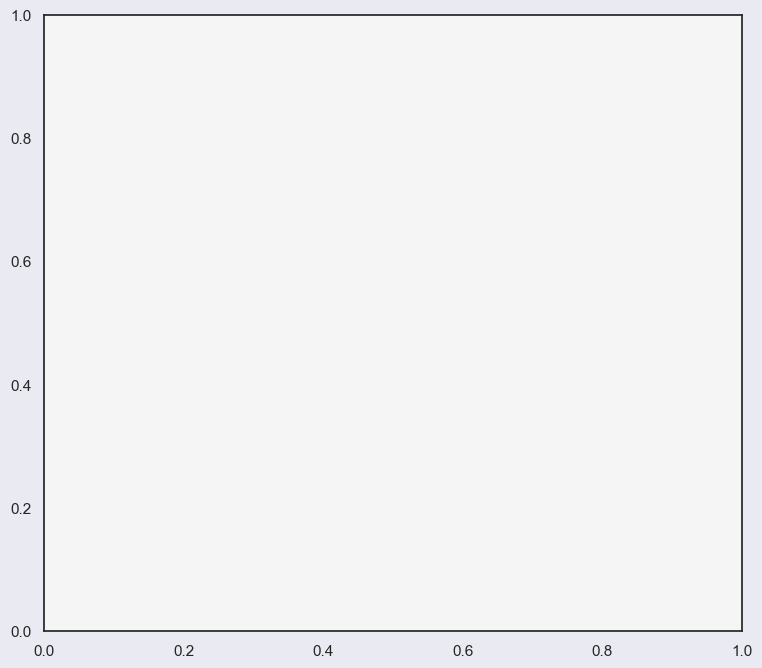

In [501]:

from matplotlib.animation import FuncAnimation
from matplotlib import animation
from geopy.distance import geodesic
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib
# Initialize the plot
fig, ax = plt.subplots(figsize=(9, 8))
# Create a list of unique 'Year-Month' frames for the animation
f = aerial_euafrica_raids["Year-Month"].dropna().sort_values().unique()
# Generate a colormap for years
unique_years = aerial_euafrica_raids["Mission Date"].dt.year.dropna().unique()

colors_a = [matplotlib.colormaps["cool"] (x) for x in np.linspace(0, 1, len(unique_years))]
colors_b = [matplotlib.colormaps["inferno"] (x) for x in np.linspace(0, 1, len(unique_years))]

year_to_color_bases = {year: colors_a[i] for i, year in enumerate(unique_years)}
year_to_color_targets = {year: colors_b[i] for i, year in enumerate(unique_years)}


aerial_euafrica_raids["Takeoff Longitude"] = aerial_euafrica_raids["Takeoff Longitude"][
    aerial_euafrica_raids["Takeoff Longitude"] < 180
]

aerial_euafrica_raids["Takeoff Latitude"] = aerial_euafrica_raids["Takeoff Latitude"][
    aerial_euafrica_raids["Takeoff Latitude"] < 90
]

aerial_euafrica_raids.to_csv ("test.csv")

# Initialization function
def init():
    europe_north_africa.plot(ax=ax, color="gold", edgecolor="black", zorder=1)
    fig.patch.set_visible(False)  # Remove figure background
    ax.set_title("Mission Takeoff Animation")
    ax.set_xlim(-30, 60)
    ax.set_ylim(15, 90)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("")  # Remove y-axis label
    return ax

# Animation function
def animate(frame):
    ax.clear()
    fig.patch.set_visible(False)
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')         # Set axes background to black

    europe_north_africa.plot(ax=ax, color="gray", edgecolor="black", zorder=1)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("")  # Remove y-axis label
    # Filter data for the current Year-Month
    current_data = aerial_euafrica_raids[aerial_euafrica_raids["Year-Month"] == frame]
    current_year = frame.year
    
    start_lon = current_data["Takeoff Longitude"]
    start_lat = current_data["Takeoff Latitude"] 

    end_lon = current_data["Target Longitude"]
    end_lat = current_data["Target Latitude"]
    


    # Plot takeoff points with color based on Year
    ax.scatter(
        current_data["Takeoff Longitude"],
        current_data["Takeoff Latitude"],
        color='blue',
        marker="o",
        s=50,
        label=f"Base take off, Date: {frame}"
    )
    ax.scatter(
        current_data["Target Longitude"],
        current_data["Target Latitude"],
        color='red',
        marker="x",
        s=50,
        label=f"Target location"
    )

    ax.plot([start_lon, end_lon], [start_lat, end_lat], color="yellow", linestyle="--", linewidth=1)

    # Add titles and legend
    #ax.set_title(f"Takeoff Points - {frame}")
    ax.set_xlim(-30, 60)
    ax.set_ylim(15, 90)
    ax.legend(loc="upper right")

    return ax


# Display the animatio


**Bombing Missions 1939 - 1945**


In [502]:
from IPython.display import HTML
from matplotlib import animation

anim = animation.FuncAnimation(fig, animate, init_func = init, frames = f, interval=200)
html_str = anim.to_jshtml()
with open("euoperations.html", "w") as file:
    file.write(html_str)
#writer = animation.FFMpegWriter(fps=12)
#anim.save('EuOps.mp4', writer=writer)



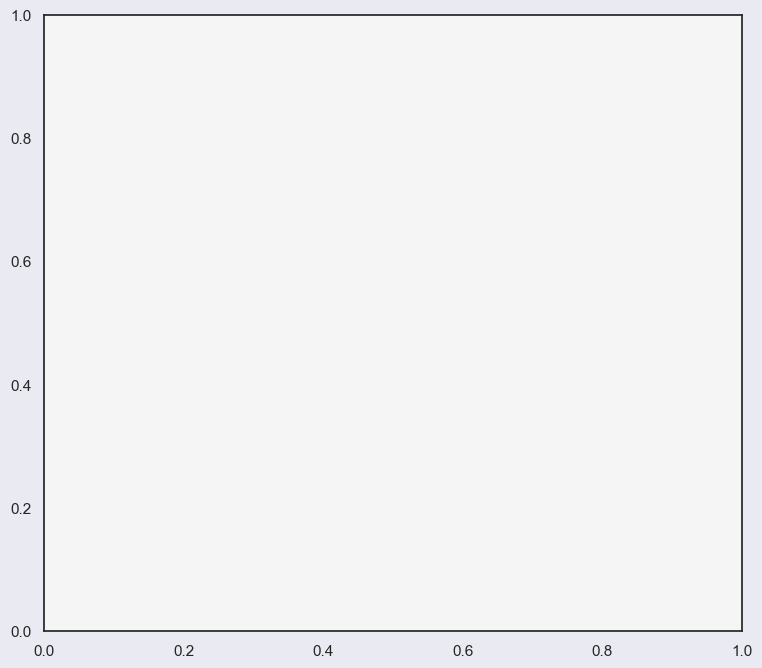

In [503]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib

# Initialize the plot
fig, ax = plt.subplots(figsize=(9, 8))
# Create a list of unique 'Year-Month' frames for the animation
f = aerial_pacific_raids["Year-Month"].dropna().sort_values().unique()
# Generate a colormap for years
unique_years = aerial_pacific_raids["Mission Date"].dt.year.dropna().unique()

colors_a = [matplotlib.colormaps["cool"] (x) for x in np.linspace(0, 1, len(unique_years))]
colors_b = [matplotlib.colormaps["inferno"] (x) for x in np.linspace(0, 1, len(unique_years))]

year_to_color_bases = {year: colors_a[i] for i, year in enumerate(unique_years)}
year_to_color_targets = {year: colors_b[i] for i, year in enumerate(unique_years)}

aerial_pacific_raids["Takeoff Longitude"] = aerial_pacific_raids["Takeoff Longitude"][
    aerial_pacific_raids["Takeoff Longitude"] > 90
]

aerial_pacific_raids["Takeoff Latitude"] = aerial_pacific_raids["Takeoff Latitude"][
    aerial_pacific_raids["Takeoff Latitude"] < 90
]

aerial_pacific_raids.to_csv ("test.csv")

# Initialization function
def init():
    pacific_war.plot(ax=ax, color="gold", edgecolor="black", zorder=1)
    fig.patch.set_visible(False)  # Remove figure background
    ax.set_title("Mission Takeoff Animation")
    ax.set_xlim(90, 180)  # Longitude range
    ax.set_ylim(-25, 90)   # Latitude range
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("")  # Remove y-axis label
    return ax

# Animation function
def animate_pacific(frame):
    ax.clear()
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')         # Set axes background to black
    fig.patch.set_visible(False)
    pacific_war.plot(ax=ax, color="gray", edgecolor="black", zorder=1)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("")  # Remove y-axis label
    # Filter data for the current Year-Month
    current_data = aerial_pacific_raids[aerial_pacific_raids["Year-Month"] == frame]
    current_year = frame.year

    # Plot takeoff points with color based on Year
    ax.scatter(
        current_data["Takeoff Longitude"],
        current_data["Takeoff Latitude"],
        color='blue',
        marker="o",
        s=50,
        label=f"Base take off, Date: {frame}"
    )
    ax.scatter(
        current_data["Target Longitude"],
        current_data["Target Latitude"],
        color='red',
        marker="x",
        s=50,
        label=f"Target location"
    )
    start_lon = current_data["Takeoff Longitude"]
    start_lat = current_data["Takeoff Latitude"] 

    end_lon = current_data["Target Longitude"]
    end_lat = current_data["Target Latitude"]

    ax.plot([start_lon, end_lon], [start_lat, end_lat], color="yellow", linestyle="--", linewidth=1)

    # Add titles and legend
    #ax.set_title(f"Takeoff Points - {frame}")
    ax.set_xlim(90, 180)  # Longitude range
    ax.set_ylim(-25, 90)   # Latitude range
    ax.legend(loc="upper right")
    return ax


In [504]:
from IPython.display import HTML
from matplotlib import animation

anim = animation.FuncAnimation(fig, animate_pacific, init_func = init, frames = f, interval=1000)
HTML (anim.to_jshtml())
html_str = anim.to_jshtml()
writer = animation.FFMpegWriter(fps=12)
anim.save('PaOps.mp4', writer=writer)
with open('PaOps.html', 'w') as f:
    f.write(html_str)